# K means聚类

### 0.引入依赖

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#从sklearn中直接生成聚类数据
from sklearn.datasets.samples_generator import make_blobs

### 1.加载数据

In [3]:
x, y = make_blobs( n_samples = 100, centers = 6, random_state = 1234, cluster_std = 0.5 )

#plt.figure(figsize = (12, 12))
#plt.scatter( x[:, 0], x[:, 1], c = y) # c = y 按y分布颜色
#plt.show()

### 2.算法实现

In [4]:
#引入scipy中的距离函数，默认欧氏距离
from scipy.spatial.distance import cdist

class K_means(object):
    #初始化 参数， 迭代次数，初始质心
    def __init__(self, n_clusters = 6, max_iter = 300, centroids = []):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = np.array( centroids, dtype = np.float )
        
    #训练模型，K_means聚类过程，传入原始数据
    def fit(self, data):
        #假如没有初始化质心，就随机选取data中的点作为初始质心
        if (self.centroids.shape == (0, )):
            #从data中随机生成0到data行数的6个整数，作为索引值
            self.centroids = data[ np.random.randint( 0, data.shape[0], self.n_clusters ), :]
        
        for i in range(self.max_iter):
            # 1.计算距离矩阵,得到的是一个100*6的矩阵
            distances = cdist(data, self.centroids)
            
            # 2.按照距离由近到远排序，选取最近的质心点的类别，作为当前点的分类
            c_ind = np.argmin( distances, axis = 1)
            
            # 3. 对每一类数据进行均值计算，更新质心点的坐标
            for i in range(self.n_clusters):
                # 排除掉没有出现在c_ind里的类别
                if i in c_ind:
                    # 选出所有类别是i的点，取data里面坐标的均值，更新第i个质心
                    self.centroids[i] = np.mean( data[c_ind == i], axis = 0 )
        
    #实现预测方法
    def predict(self, samples):
        # 跟上面一样，先计算距离矩阵，然后选取距离最近的那个质心的类别
        distances = cdist(samples, self.centroids)
        c_ind = np.argmin(distances, axis = 1)
        
        return c_ind

### 3.测试

In [5]:
def plotKMeans(x, y, centroids, subplot, title):
    plt.subplot(subplot)
    plt.scatter(x[:,0], x[:,1], c = 'r')
    
    #画出质心点
    plt.scatter(centroids[:, 0], centroids[:, 1], c = np.array(range(6)), s = 100)
    plt.title(title)
    plt.show()

<IPython.core.display.Javascript object>


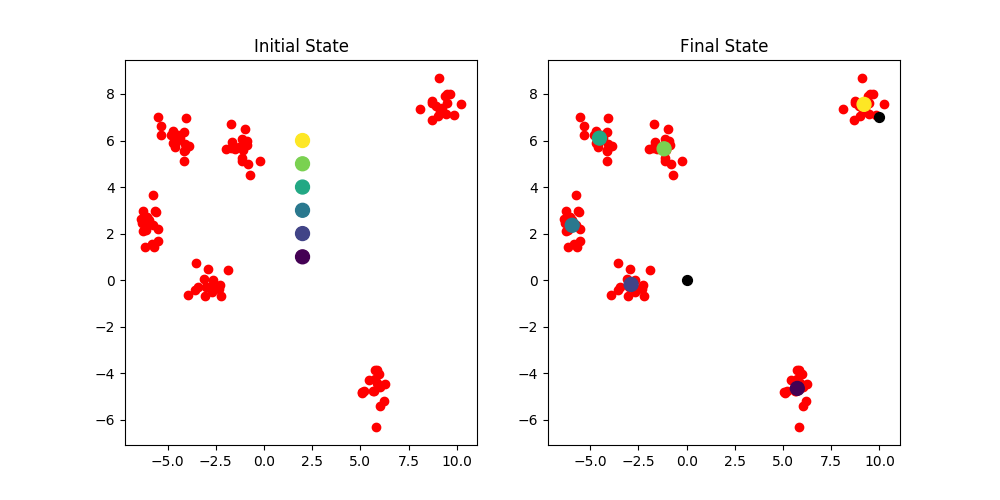

[1 5]


In [8]:
#这一块有问题，几幅图没有叠加到一起
%matplotlib notebook
kmeans = K_means(max_iter = 300, centroids = np.array([[2,1], [2,2], [2,3], [2,4], [2,5],[2,6]]))

plt.figure(figsize = (10, 5))
plotKMeans(x, y, kmeans.centroids, 121, 'Initial State')

kmeans.fit(x)
plotKMeans(x, y, kmeans.centroids, 122, 'Final State')

# 预测新数据点的类别
x_new = np.array([[0, 0], [10, 7]])
y_pred = kmeans.predict(x_new)

print(y_pred)

plt.scatter(x_new[:,0], x_new[:,1], s = 50, c = 'black')